# Rank Histograms

### Classes and modules

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
import datetime
from IPython.display import display
import copy

#For plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"

import pycuda.driver as cuda

### Ranks

In [2]:
source_path = "/home/florianb/havvarsel/multilevelDA/scripts/RankHistograms/Basin/2023-05-24T18_30_16"

In [3]:
def plot_histogram(T, mode, bins_size=1/25, fromDump=False):
    
    if fromDump:
        files = []
        for f in os.listdir(source_path+"/dump"):
            if f.startswith("ML"+mode+"Ranks_"+str(T)):
                files.append(os.path.abspath(os.path.join(source_path,f)))
                ML_ranks = np.empty((1,3))
        for f in files:
            ML_ranks = np.vstack([ML_ranks, np.load(f)])

    else:
        ML_ranks = np.load(source_path+"/ML"+mode+"Ranks_"+str(T)+".npy")

    fig, axs = plt.subplots(1, 3, figsize=(15,3))
    fig.suptitle(r"$\bf{ML ranks}$ for "+mode+" at "+str(T),y=1.1)

    axs[0].set_title("eta")
    axs[1].set_title("hu")
    axs[2].set_title("hv")

    bins = np.arange(0,1+1e-9,bins_size)

    for i in range(3):
        hist = np.histogram(ML_ranks[:,i], bins=bins)
        axs[i].bar(0.5*(hist[1][1:]+hist[1][:-1]),hist[0]/len(ML_ranks)/bins_size, width=bins_size, color="C0")
        
        axs[i].set_ylim((0,1.5))
        axs[i].set_xlim((0,1.0))

        axs[i].plot([0,1],[1,1], color="black", ls="--", lw=3)

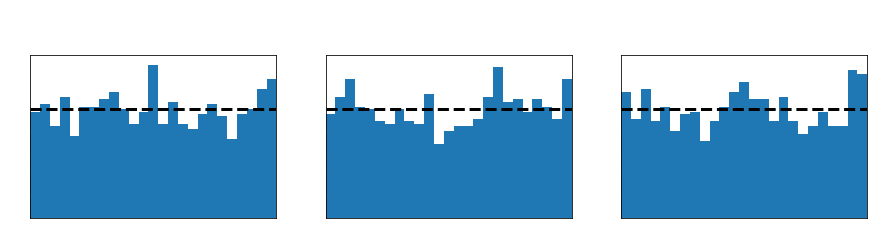

In [4]:
plot_histogram(0, "prior")

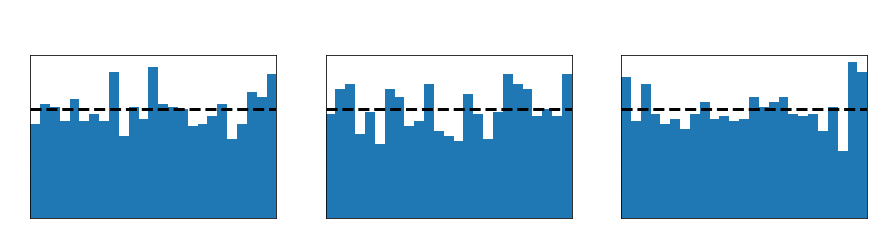

In [5]:
plot_histogram(0, "posterior")

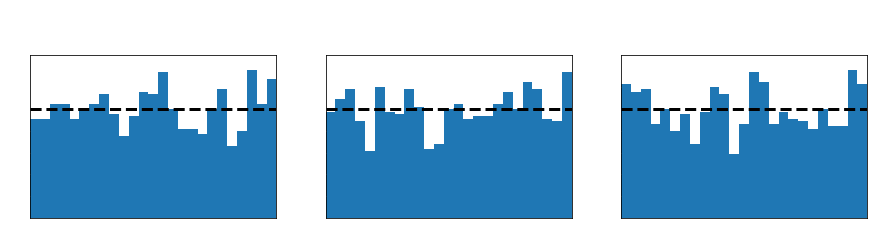

In [6]:
plot_histogram(900, "prior")

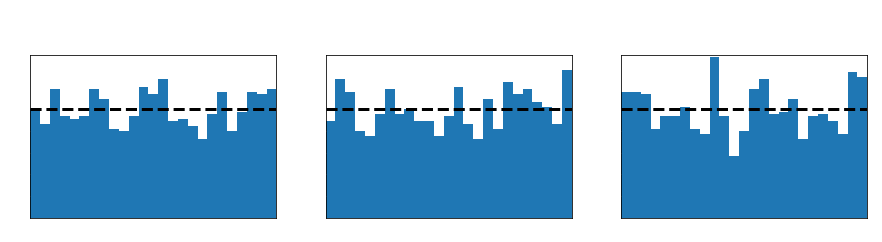

In [7]:
plot_histogram(900, "posterior")

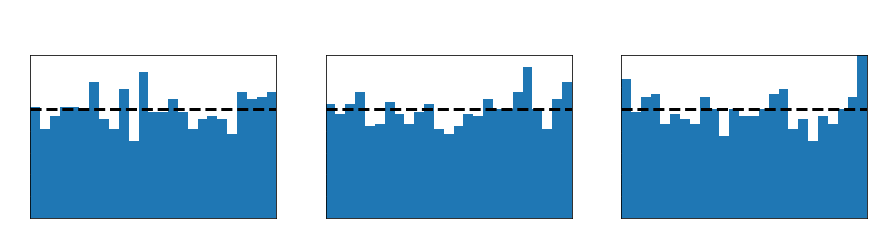

In [8]:
plot_histogram(1800, "prior")

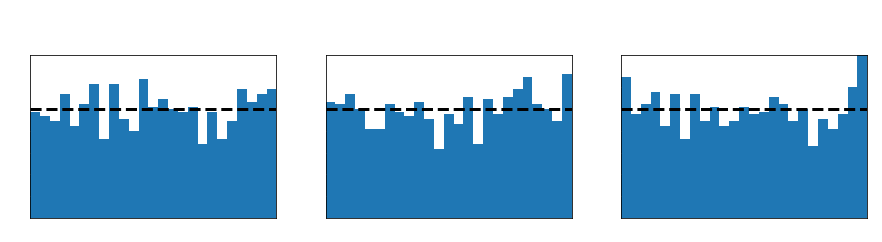

In [9]:
plot_histogram(1800, "posterior")

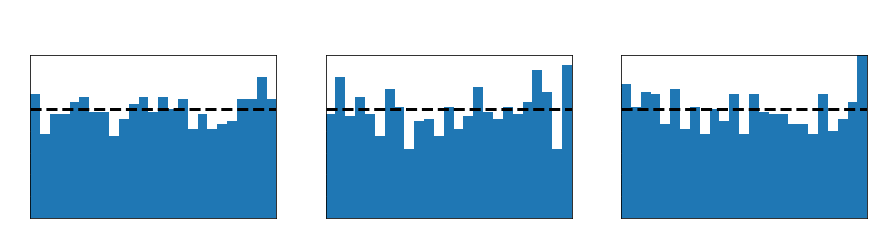

In [10]:
plot_histogram(3600, "prior")

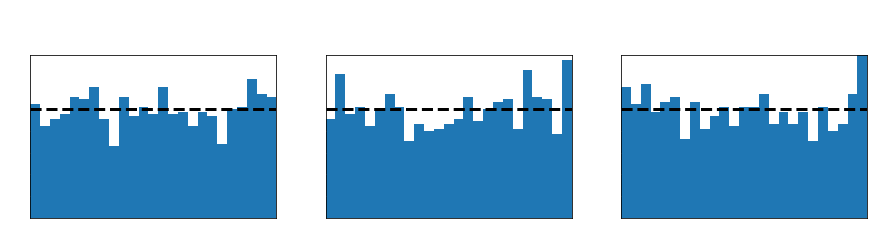

In [11]:
plot_histogram(3600, "posterior")

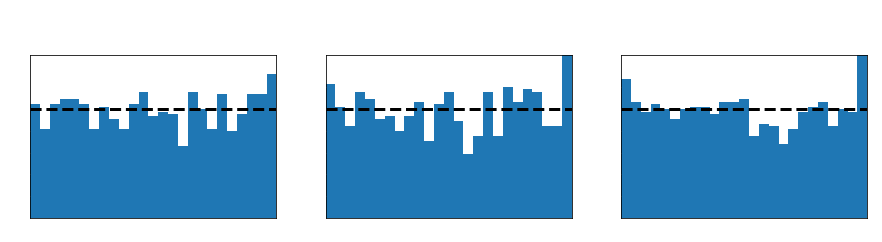

In [12]:
plot_histogram(7200, "posterior")

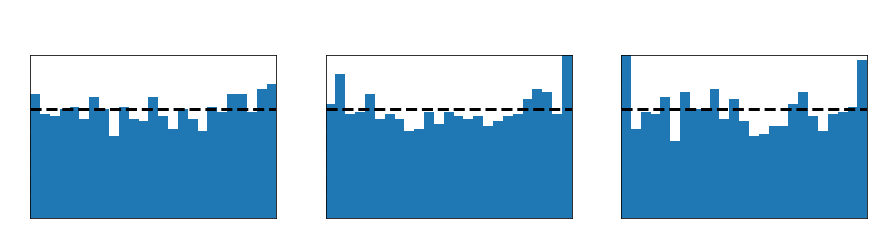

In [13]:
plot_histogram(10800, "prior")

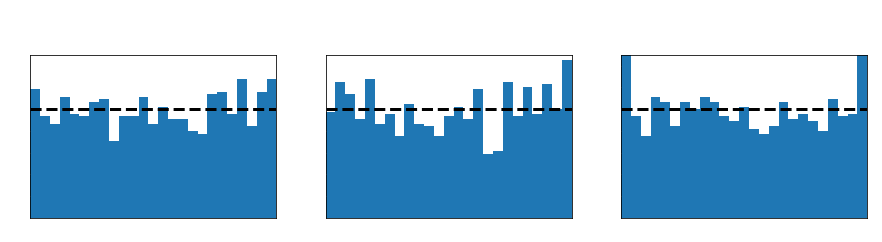

In [14]:
plot_histogram(10800, "posterior")

In [15]:
ML_ranks = np.load(source_path+"/MLposteriorRanks_10800.npy")

In [17]:
np.sum(ML_ranks > 1)

9

In [19]:
len(ML_ranks)/1/25

44.0